In [24]:
import os
data_path='/Users/liubo/Science_dataset/DogandCat'
path='/Users/liubo/Science_dataset/DogandCat/train'
project_path='/Users/liubo/PycharmProjects/tensorflow_ml'
print(os.listdir(data_path))

['.DS_Store', 'test', 'sampleSubmission.csv', 'train']


In [21]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,Activation,Flatten,BatchNormalization,Conv2D,MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
%matplotlib inline

In [22]:
os.chdir(project_path)
if os.path.isdir('train/dog')is False:
    os.makedirs('train/dog')
    os.makedirs('train/cat')
    os.makedirs('val/dog')
    os.makedirs('val/cat')
    os.makedirs('test/dog')
    os.makedirs('test/cat')
    
    for c in random.sample(glob.glob('/Users/liubo/Science_dataset/DogandCat/train/cat*'),500):
        shutil.move(c,'train/cat')     
    for c in random.sample(glob.glob('/Users/liubo/Science_dataset/DogandCat/train/dog*'),500):
        shutil.move(c,'train/dog')
    for c in random.sample(glob.glob('/Users/liubo/Science_dataset/DogandCat/train/dog*'),100):
        shutil.move(c,'val/dog')
    for c in random.sample(glob.glob('/Users/liubo/Science_dataset/DogandCat/train/cat*'),100):
        shutil.move(c,'val/cat')
    for c in random.sample(glob.glob('/Users/liubo/Science_dataset/DogandCat/train/dog*'),50):
        shutil.move(c,'test/dog')
    for c in random.sample(glob.glob('/Users/liubo/Science_dataset/DogandCat/train/cat*'),50):
        shutil.move(c,'test/cat')

In [35]:
train_path='./train'
val_path='./val'
test_path='./test'

In [44]:
train_batch=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path,target_size=(224,224),classes=['cat','dog'],batch_size=10)


val_batch=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=val_path,target_size=(224,224),classes=['cat','dog'],batch_size=10)


test_batch=ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path,target_size=(224,224),classes=['cat','dog'],batch_size=10,shuffle=False)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [49]:
assert train_batch.n==1000
assert val_batch.n==200
assert test_batch.n==100
assert train_batch.num_classes==val_batch.num_classes==test_batch.num_classes==2

In [50]:
imgs,labels=next(train_batch)

In [53]:
def plotImages(image_arr):
    fig,axes=plt.subplots(1,10,figsize=(20,20))
    axes=axes.flatten()
    for img,ax in zip(image_arr,axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
    

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

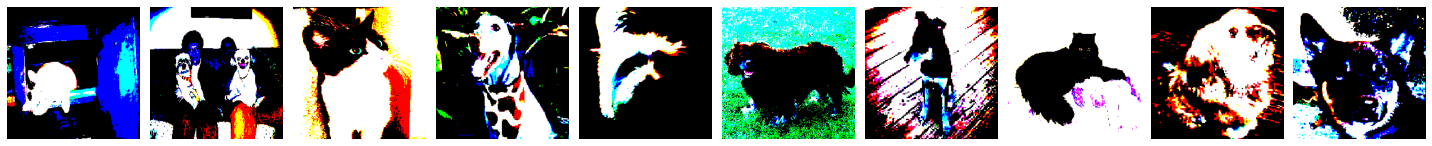

In [54]:
plotImages(imgs)